# <span style = 'font-size: 30pt; font-family: Comic Sans MS Bold; color:#ee7500'>Witch Candy?</span>

<span style = 'color: darkgray'>(Haha, yes that was on purpose!)</span>

<span style = 'font-size: 12pt'>In this notebook, we will be looking at <a href = "https://www.kaggle.com/fivethirtyeight/the-ultimate-halloween-candy-power-ranking" style="text-decoration: none; border-bottom: 1px solid white;"> <span style = 'font-family: Comic Sans MS Bold; color: #ee7500'>The Ultimate Halloween Candy Power Ranking</span> </a> dataset available from the <a href = "https://www.kaggle.com/" style="text-decoration: none; border-bottom: 1px solid white">Kaggle</a> website.</span>

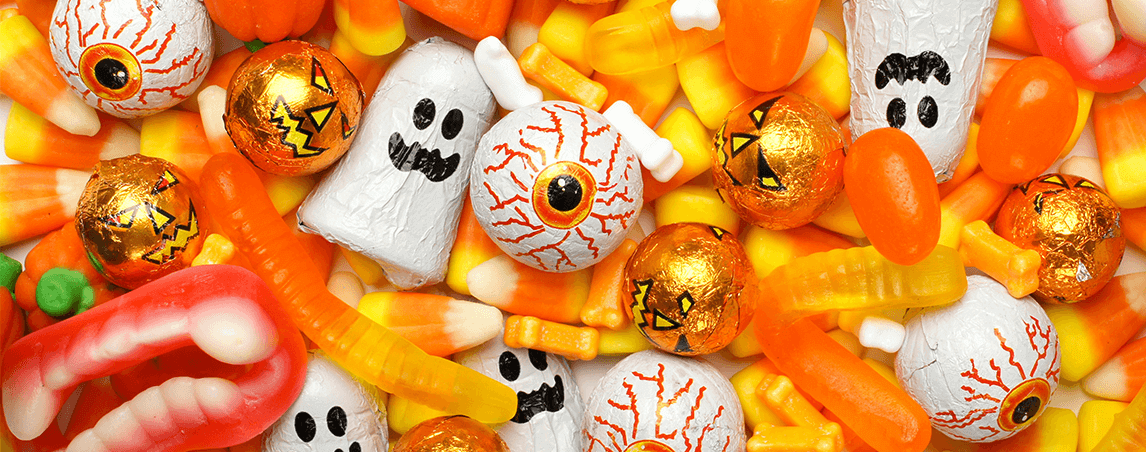

---

# <span style = 'font-family: Comic Sans MS Bold; color:#ee7500'>About the Data</span>

This data was originally collected in order to answer the question "What's the best (or at least the most popular) Halloween candy?".  The data was collected from <a href = "http://walthickey.com/2017/10/18/whats-the-best-halloween-candy/" style="text-decoration: none; border-bottom: 1px solid white"> Walt Hickey's website</a> which was created so that participants could go to the website and choose between two fun-sized candies presented to them to indicate which candy they would prefer to have distributed to their Halloween bucket.  More than 269,000 votes were collected from 8,371 different IP addresses.  

The data in the <span style = 'font-family: Comic Sans MS Bold; color:#ee7500'>candy-data.csv</span> file includes attributes for each candy along with its ranking. For binary variables, 1 means yes, 0 means no. The data contains the following fields: 

* **chocolate:** Does it contain chocolate?
* **fruity:** Is it fruit flavored?
* **caramel:** Is there caramel in the candy?
* **peanutalmondy:** Does it contain peanuts, peanut butter or almonds?
* **nougat:** Does it contain nougat?
* **crispedricewafer:** Does it contain crisped rice, wafers, or a cookie component?
* **hard:** Is it a hard candy?
* **bar:** Is it a candy bar?
* **pluribus:** Is it one of many candies in a bag or box?
* **sugarpercent:** The percentile of sugar it falls under within the data set.
* **pricepercent:** The unit price percentile compared to the rest of the set.
* **winpercent:** The overall win percentage according to 269,000 matchups.


##### Acknowledgements:
This dataset is Copyright (c) 2014 ESPN Internet Ventures and distributed under an MIT license. Check out Walt Hickey's analysis and write-up on 538: <a href = "http://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/" style="text-decoration: none; border-bottom: 1px solid white"> The Ultimate Halloween Candy Power Ranking</a>. Thanks to Walt Hickey for making the data available.

---

# <span style = 'font-family: Comic Sans MS Bold; color:#ee7500'>Goals: What are we looking for?</span>

In this analysis, our goals are to answer the following questions:

1. **Candy Popularity:** What are the most popular Halloween Candies?  How about the least popular?
2. **Feature Analysis:** Which individual qualities are associated with higher rankings?  How about lower rankings?  What insights might we be able to draw from the comparison of these two groupings in relation to individual qualities of the candies and how it effects their popularity?
3. **Distributions:** What are the distributions of the sugar, price and win status of the top candies?  How about the least favorite candies?  What insights can we draw from the comparison of the two groupings on how sugar content and price may effect the candy's popularity?
4. **Relationships:** What possible relationships are there between sugar, price and win status for the highest ranking candies?  How about the lowest ranking candies?  What insights might we draw from the comparison of the two groupings in relation to the scatter plots of the two groups?
5. **Frequent Patterns:** What are some top frequent patterns for high ranking candies?  How about low ranking candies?  What insights might we draw from the comparison of the two groupings of top patterns?

---

# <span style = 'font-family: Comic Sans MS Bold; color:#ee7500'>Foundational Setup and Processing</span>

The first thing we'll do is load important python packages to be used throughout the analysis, retrieve the data, store it in a pandas dataframe and perform some basic statistics on the data so that we can get a quick preview of the data structure and basic aspects of the various fields.


In [1]:
import pandas as pd
import numpy as np
import re
from math import pi
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.core.properties import value
from bokeh.io import output_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource
from bokeh.models import Legend
from bokeh.models import NumeralTickFormatter
from bokeh import palettes
from bokeh.transform import factor_cmap, dodge, jitter
import seaborn as sns
sns.set(style="whitegrid")
from matplotlib import pyplot
import pyfpgrowth
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
output_notebook()

Loading BokehJS ...

In addition to getting the data, we will also assure that the text field does not contain any preceding or trailing white space by using a lambda function to correct for this possibility within the data.

In [2]:
candy_df = pd.read_csv("candy-data.csv", header = 0)
candy_df = candy_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
candy_df.tail(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
75,Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313,0.511,43.068897
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,45.736748
77,Tootsie Roll Snack Bars,1,0,0,0,0,0,0,1,0,0.465,0.325,49.653503
78,Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313,0.255,47.173229
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113


Above, we can see the fields within this data set as described above.  We can also see that within the "competitorname" field, there are some strange characters in place of where there should be apostrophes.  Let's clean that up by doing a search and replace.  

In [3]:
candy_df['competitorname'] = candy_df['competitorname'].str.replace(r'Õ', '\'')
candy_df.tail(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
75,Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313,0.511,43.068897
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,45.736748
77,Tootsie Roll Snack Bars,1,0,0,0,0,0,0,1,0,0.465,0.325,49.653503
78,Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313,0.255,47.173229
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113


Awesome!  Now, our text field is clean.  

Next, let's look at the types of each of the fields to verify they all have the best type for our analaysis below.

In [4]:
candy_df.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

These are the types we expect for each of these fields so we can move on.  Now, let's looks at some basic describe statistics about the data.

In [5]:
candy_df.describe(include = 'all')

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
unique,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Haribo Happy Cola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,NaN,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998


From the descriptive statistics table above, we learn many important aspects of this data set:

1. **Missing Data:** We see from the 'count' row the number of non-empty cells within each field of this data set.  In this case, we do not have any missing values which need to be addressed. In the much more common case where there is missing data, there are many methods to fill or otherwise account for missing data including filling forward, filling backward, filling with the mean, median, min or max, etc.  There are also a number a machine learning methods to fill categorical and other types of fields through classification if needed and appropriate.  
2. **Dirty Data:** Above, we used regular expressions to clean up the one text field we have.  Often, our data will be much dirtier and much more irregular and will require more strenuous steps to clean.  I will happily provide multiple examples of instances where I have accomplished this on request.
3. **The Big 5:** We can also see the big 5 descriptive statistics for each field: mean, median, min, max and standard deviation.  From knowing the types of each of the fields as well as the kind of data stored in each field, we can use these descriptive statistics to see that the values in each field seem reasonable and expected from a bird's eye view: the binary fields have mins of Zero and maxs of One; the continuous numeric fields have means and medians that are relatively close within their respective field, the mins and maxs seem reasonable, and the standard deviations seems reasonable, respectively.
4. **Percentiles:** We are also given the 25th and 75th percentiles for each field as well, and they also seems reasonable and expected.  
5. **Categorical Data:** For the sole categorical field, we can see that each record has a unique value in this field and the frequency of each value within this field is One.  This is what we expect.  

We will visualize some of these values later in this notebook so that we can review these concepts more fully. Fut first, we need to take care of one more wrinkle in this data set.  From the writeup of this data, there are two entries in the data which do not align with the remainder of the data: "One dime" and "One quarter".  For our analysis, we will drop these records from the data.  We are only interested in candy in this analysis. As a check that we actually do drop these records, we'll print the size of the dataframe both before and after the call to drop the rows. 


In [6]:
candy_df.set_index('competitorname', inplace = True)
print("Number of Rows in the dataframe before the drop method is called: ", candy_df.shape[0])
candy_df = candy_df.drop(['One dime', 'One quarter'])
print("Number of Rows in the dataframe after the drop method is called: ", candy_df.shape[0])

Number of Rows in the dataframe before the drop method is called:  85
Number of Rows in the dataframe after the drop method is called:  83


Now, our data is clean, structured the way we want and expect it to be and ready for analysis.  

---

# <span style = 'font-family: Comic Sans MS Bold; color:#ee7500'>Analysis</span>

Now, we can address the questions we have listed above.  


### <span style = 'font-family: Comic Sans MS Bold; color:#ee7500'>Candy Popularity</span>

Our first set of questions are about candy popularity.  Let's create some interactive ordered plots so that we can review  the most popular and the least popular candies with the use of a wonderful visualization package in python called Bokeh.

In [7]:
candy_df.sort_values(by = 'winpercent', ascending = 0, inplace = True)

mostPopularCandy = list(candy_df.index[:10])
highPopularity = list(candy_df.winpercent[:10] / 100.0)

source = ColumnDataSource(data=dict(mostPopularCandy = mostPopularCandy, highPopularity = highPopularity))

p = figure(y_range = mostPopularCandy, plot_height = 400, plot_width = 800, 
           title = "Most Popular Halloween Candies")
p.hbar(y = 'mostPopularCandy', right = 'highPopularity', height = 0.7, source = source, line_color = 'white', 
       fill_color = 'orange')

p.ygrid.grid_line_color = None
p.x_range.start = 0
p.x_range.end = 1
p.xaxis[0].formatter = NumeralTickFormatter(format = "0.00%")
p.xaxis.major_label_text_font_size = "10pt"
p.yaxis.major_label_text_font_size = "10pt"
p.title.text_font = "comic sans ms bold"
p.title.text_font_size = '20pt'

show(p)

In [8]:
leastPopularCandy = list(candy_df.index[-10:])
lowPopularity = list(candy_df.winpercent[-10:] / 100.0)

source = ColumnDataSource(data=dict(leastPopularCandy = leastPopularCandy, lowPopularity = lowPopularity))

p = figure(y_range = leastPopularCandy, plot_height = 400, plot_width = 800, 
           title = "Least Popular Halloween Candies")
p.hbar(y = 'leastPopularCandy', right = 'lowPopularity', height = 0.7, source = source, line_color = 'white', 
       fill_color = 'dimgray')

p.ygrid.grid_line_color = None
p.x_range.start = 0
p.x_range.end = 1
p.xaxis[0].formatter = NumeralTickFormatter(format = "0.00%")
p.xaxis.major_label_text_font_size = "10pt"
p.yaxis.major_label_text_font_size = "10pt"
p.title.text_font = "comic sans ms bold"
p.title.text_font_size = '20pt'

show(p)

---

### <span style = 'font-family: Comic Sans MS Bold; color:#ee7500'>Feature Analysis</span>

Now, we'll take a look at the individual features within the data and see which ones where most prominent for the highest ranking candies and which ones were most prominent for the lowest ranking candies.  Then, we will consider what insights we may draw from comparing these results.  In order to make comparison easier, we will create a plot with two parallel subplots for easy comparison.

First, we'll gather the binary features and sum them.  Then, we'll gather the continuous features and calculate their respective averages.  Finally, we'll combine these in two lists and plot them.

In [9]:
features = list(candy_df.columns.values[:9]) + ["sugarFactor", "priceFactor"]
Faves = list(np.sum(candy_df.iloc[:10, 0:9])) + list(round(np.mean(candy_df.iloc[:10, 9:11]), 2))
NoThanks = list(np.sum(candy_df.iloc[-10:, 0:9])) + list(round(np.mean(candy_df.iloc[-10:, 9:11]), 2))

categories= ['Faves', 'NoThanks']
data = {'features' : features,
        'Faves'   : Faves,
        'NoThanks'   : NoThanks}
source = ColumnDataSource(data = data)

p = figure(x_range = features, y_range = (0, 13), plot_height = 400, plot_width = 900,
           title = "Features of the Most and Least Favorite Halloween Candies")

p.vbar(x = dodge('features', -0.15, range = p.x_range), top = 'Faves', width = 0.3, source = source,
       color = "orange", legend = value("Faves"))

p.vbar(x = dodge('features',  0.15,  range = p.x_range), top = 'NoThanks', width = 0.3, source = source,
       color = "dimgray", legend = value("NoThanks"))

p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = pi/4
p.xaxis.major_label_text_font_size = "10pt"
p.yaxis.major_label_text_font_size = "10pt"
p.title.text_font = "comic sans ms bold"
p.title.text_font_size = '20pt'
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

From this plot, we can see that chocolate and nutty flavors as well as candy being in a bar form are more prominent features amoung the most popular Halloween candies.  On the other hand, fruitiness and candy sold in variety packs (pluribus) are more prominent for the least popular Halloween candies.  Surprisingly, the presence of caramel doesn't look to factor in much to whether a Halloween candy is favored or not favored since it is the same for both the most and the least popular Halloween candies.  In addition, if we use Bokeh's wonderful interactive tools, we can zoom in to the sugar and price factors to get a closer look at how these two features effect whether a Halloween candy is popular or not.  From this zoomed in plot on these two features, it seems their effect on the overall popularity of a Halloween candy is only moderate at best.  

---

### <span style = 'font-family: Comic Sans MS Bold; color:#ee7500'>Distributions and Relationships</span>

Now, let's take a look at the distributions and relationships of the continuous numeric fields in our data (sugarpercent, pricepercent and winpercent) for the most and least popular Halloween Candies and then consider what conclusions we may draw from these visualizations.


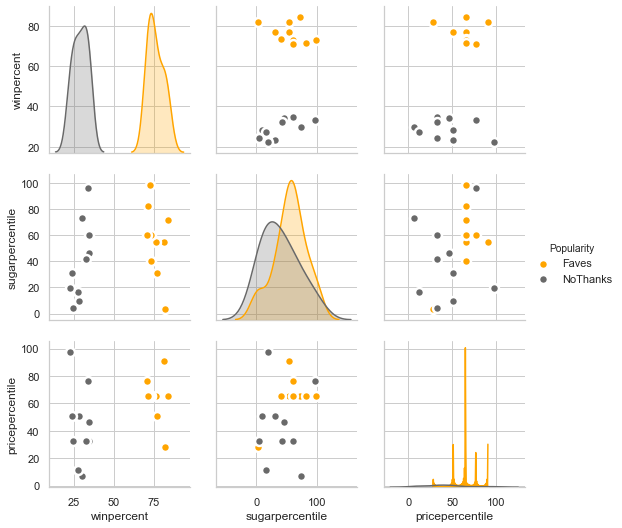

In [10]:
features = candy_df.columns.values[9:]
Faves_df = candy_df.iloc[:10, 9:]
Faves_df["sugarpercentile"] = Faves_df.sugarpercent * 100.0
Faves_df["pricepercentile"] = Faves_df.pricepercent * 100.0
Faves_df['Popularity'] = 'Faves'
Faves_df.drop(["sugarpercent", "pricepercent"], axis = 1, inplace = True)
NoThanks_df = candy_df.iloc[-10:, 9:]
NoThanks_df["sugarpercentile"] = NoThanks_df.sugarpercent * 100.0
NoThanks_df["pricepercentile"] = NoThanks_df.pricepercent * 100.0
NoThanks_df['Popularity'] = 'NoThanks'
NoThanks_df.drop(["sugarpercent", "pricepercent"], axis = 1, inplace = True)
df = pd.concat([Faves_df, NoThanks_df])

p = sns.pairplot(df, kind = "scatter", hue = "Popularity", plot_kws = dict(s = 80, edgecolor = "white", linewidth = 2.5),
             palette = ['orange', 'dimgray'])

plt.show()

**Distributions:** 
* *winpercent*: The distributions of the winpercent field for the Most and Least Favorite Halloween Candies are as we'd expect them to be since we are looking at the highest 10 and lowest 10 ranking candies for this analysis.  There is no overlap between the two groups although their shapes are somewhat similar although they are shifted on the x-axis from each other.  
* *sugarpercentile*: The distributions of the sugarpercentiles definitely have some overlap but the favorites grouping has a much higher, slimmer peak with a smaller standard deviation than the least favorites grouping which has more spread.
* *pricepercentile*: The distributions of the pricepercentiles are very irregular.  The top favorites seemed to have very different price points although they wer mostly above the median.  The price percentiles for the least favorites seemed much more steady and flat with a lot of spread but most of the spread was at or below about the 60th percentile mark.  

**Relationships:**
* Between the groups on the various fields compared here in the scatter plots, there don't seem to be any strong positive or negative relationships amongst the fields.   

From these observations, we may conclude that price and sugar content are not the greatest deciding factors for Halloween Candy Aficionados when selecting their preferred Halloween Candy.  Also, it could be argued that price distributions between the groups have such different shapes, spreads, means, medians and standard deviations, not because of how price effects the sale of certain kinds of candies, but in fact because the demand for certain kinds of candies with certain kinds of features or collections of features effect the price.  At this point, we do not know which of these is the causation here since relationships and correlations between variables does not mean causation.  We would need to do further study such as A/B testing in order to establish any theories we may have.  

---

### <span style = 'font-family: Comic Sans MS Bold; color:#ee7500'>Frequent Patterns</span>

Now, let's take a look at possible frequent patterns in features of the most and least favorite Halloween Candies.  We mentioned in our last listing of insights that certain features or collections of features may contribute to why some candies are more or less popular than others.  So, let's take a look and see what we find.  

First, we'll convert the present data so that it is in a format more amendable to the frequent pattern process.  Then, we'll print it out to assure it is formatted how we need it.

In [11]:
# Process Favorite Candies data
FaveFeatures_df = candy_df.iloc[:10, :9].astype(str)
FaveFeatures_df.columns = ['Chocolaty', 'Fruity', 'Caramely', 'Nutty', 'Nougaty', 'Crispy-Wafery', 
                           'Hard', 'A Bar', 'Sold in Variety Packs']
features = list(FaveFeatures_df.columns.values)
for f in features[:9]:
    FaveFeatures_df[f] = FaveFeatures_df[f].str.replace('1', f)
    FaveFeatures_df[f] = FaveFeatures_df[f].str.replace('0', "Not " + f)

Quartiles_df = candy_df.iloc[:10, 9:11] * 100
Quartiles_df.columns = ['Sugar', 'Price']
Quartiles_df = (np.ceil(Quartiles_df / 25)).astype(str)
vals_to_replace = {'1.0':'Low Sugar', '2.0':'Below Average Sugar', '3.0':'Above Average Sugar', '4.0':'High Sugar'}
Quartiles_df['Sugar'] = Quartiles_df['Sugar'].map(vals_to_replace)
vals_to_replace = {'1.0':'Low Price', '2.0':'Below Average Price', '3.0':'Above Average Price', '4.0':'High Price'}
Quartiles_df['Price'] = Quartiles_df['Price'].map(vals_to_replace)

FaveFeatures_df = pd.concat([FaveFeatures_df, Quartiles_df], axis = 1)
features = features + ['Sugar', 'Price']
FaveFeatures_df

,Chocolaty,Fruity,Caramely,Nutty,Nougaty,Crispy-Wafery,Hard,A Bar,Sold in Variety Packs,Sugar,Price
competitorname,,,,,,,,,,,
Reese's Peanut Butter cup,Chocolaty,Not Fruity,Not Caramely,Nutty,Not Nougaty,Not Crispy-Wafery,Not Hard,Not A Bar,Not Sold in Variety Packs,Above Average Sugar,Above Average Price
Reese's Miniatures,Chocolaty,Not Fruity,Not Caramely,Nutty,Not Nougaty,Not Crispy-Wafery,Not Hard,Not A Bar,Not Sold in Variety Packs,Low Sugar,Below Average Price
Twix,Chocolaty,Not Fruity,Caramely,Not Nutty,Not Nougaty,Crispy-Wafery,Not Hard,A Bar,Not Sold in Variety Packs,Above Average Sugar,High Price
Kit Kat,Chocolaty,Not Fruity,Not Caramely,Not Nutty,Not Nougaty,Crispy-Wafery,Not Hard,A Bar,Not Sold in Variety Packs,Below Average Sugar,Above Average Price
Snickers,Chocolaty,Not Fruity,Caramely,Nutty,Nougaty,Not Crispy-Wafery,Not Hard,A Bar,Not Sold in Variety Packs,Above Average Sugar,Above Average Price
Reese's pieces,Chocolaty,Not Fruity,Not Caramely,Nutty,Not Nougaty,Not Crispy-Wafery,Not Hard,Not A Bar,Sold in Variety Packs,Below Average Sugar,Above Average Price
Milky Way,Chocolaty,Not Fruity,Caramely,Not Nutty,Nougaty,Not Crispy-Wafery,Not Hard,A Bar,Not Sold in Variety Packs,Above Average Sugar,Above Average Price
Reese's stuffed with pieces,Chocolaty,Not Fruity,Not Caramely,Nutty,Not Nougaty,Not Crispy-Wafery,Not Hard,Not A Bar,Not Sold in Variety Packs,High Sugar,Above Average Price
Peanut butter M&M's,Chocolaty,Not Fruity,Not Caramely,Nutty,Not Nougaty,Not Crispy-Wafery,Not Hard,Not A Bar,Sold in Variety Packs,High Sugar,Above Average Price


This is the exact format we want for our pattern analysis process.  Now let's continue with the process to perform FP-growth and Association Rules in order to define a slim set of patterns we can view to provide more insight related to this grouping of data, the top favorite Halloween Candies.

In [13]:
# convert our dataframe to a flat list. Then, reshape it before performing the pattern analysis.
tlist = []
for c in list(FaveFeatures_df.columns):
    templist = list(FaveFeatures_df[c])
    for r in templist:
        tlist.append(str(r))
        
le = preprocessing.LabelEncoder()
le.fit(tlist)
fpd = le.transform(tlist)
fpd = np.reshape(fpd, (FaveFeatures_df.shape[1], FaveFeatures_df.shape[0])).T


In [14]:
# perform pattern analysis
# only include field values that are present at least 70% of the time in its respective field.
# this reduces the number patterns from category values that are not present often
patterns = pyfpgrowth.find_frequent_patterns(fpd, int(FaveFeatures_df.shape[0] * 0.7))

In [15]:
# now, let's define and apply association rules in order to determine which patterns occur
# with other patterns 100% of the time (order matters here).  This will reduce the number of patterns 
# and make the results more easily interpretable.
rules = pyfpgrowth.generate_association_rules(patterns, 1.0)

In [16]:
# next, we'll create sets of related patterns to reduce overlap, duplicates and redundancy
mlist = []
for k, v in rules.items():
    rlist = list(k)
    for i in v[0]:
        rlist.append(i)
    s = set(rlist)
    mlist.append(sorted(list(s)))

In [17]:
# traverse through the patterns in mlist, inverse transform the labled data to its original text form, 
# and create a dictionary of how many times each unique pattern occurred in the data.
pdict = {}
for m in mlist:
    p = list(le.inverse_transform(m))
    temp = np.array(FaveFeatures_df)
    for item in p:
        temp2 = []
        for t in temp:
            if item in t:
                temp2.append(t)
        temp = temp2
    key = tuple(p)
    if key not in pdict:
        pdict[tuple(p)] = len(temp)            
            
sorted_d = sorted(pdict.items(), key=lambda x: x[1], reverse=True)


In [18]:
# plot the resulting frequent patterns found and how many times each was found in this subdata set of Favorites
pats = []
counts = []
for tup1 in sorted_d:
    bar_title = ''
    for p in tup1[0]:
        if bar_title == '':
            bar_title = p 
        else:
            bar_title = bar_title + ', ' + p
    pats.append(bar_title)
    counts.append(tup1[1])

source = ColumnDataSource(data = dict(pats = pats, counts = counts))

p = figure(y_range = pats, plot_height = 250, plot_width = 950, 
           title = "Top Halloween Candies: Most Common Feature Combos")
p.hbar(y = 'pats', right = 'counts', height = 0.6, source = source, line_color = 'white', 
       fill_color = factor_cmap('pats', palette = palettes.inferno(len(pats)), factors = pats))

p.ygrid.grid_line_color = None
p.x_range.start = 0
p.x_range.end = 10
p.xaxis.major_label_text_font_size = "9pt"
p.yaxis.major_label_text_font_size = "9pt"
p.title.text_font = "comic sans ms bold"
p.title.text_font_size = '14pt'

show(p)

From this plot, we see that the most prominent combination of features in the top 10 Halloween Candies is for the candy to be chocolaty, not fruity and not a hard candy.  Now, let's look at the patterns for the least favorite Halloween candies.

In [19]:
# Process Least Favorite Candies data
NoThanksFeatures_df = candy_df.iloc[-10:, :9].astype(str)
NoThanksFeatures_df.columns = ['Chocolaty', 'Fruity', 'Caramely', 'Nutty', 'Nougaty', 'Crispy-Wafery', 
                           'Hard', 'A Bar', 'Sold in Variety Packs']
features = list(NoThanksFeatures_df.columns.values)
for f in features[:9]:
    NoThanksFeatures_df[f] = NoThanksFeatures_df[f].str.replace('1', f)
    NoThanksFeatures_df[f] = NoThanksFeatures_df[f].str.replace('0', "Not " + f)

Quartiles_df = candy_df.iloc[-10:, 9:11] * 100
Quartiles_df.columns = ['Sugar', 'Price']
Quartiles_df = (np.ceil(Quartiles_df / 25)).astype(str)
vals_to_replace = {'1.0':'Low Sugar', '2.0':'Below Average Sugar', '3.0':'Above Average Sugar', '4.0':'High Sugar'}
Quartiles_df['Sugar'] = Quartiles_df['Sugar'].map(vals_to_replace)
vals_to_replace = {'1.0':'Low Price', '2.0':'Below Average Price', '3.0':'Above Average Price', '4.0':'High Price'}
Quartiles_df['Price'] = Quartiles_df['Price'].map(vals_to_replace)

NoThanksFeatures_df = pd.concat([NoThanksFeatures_df, Quartiles_df], axis = 1)
features = features + ['Sugar', 'Price']
NoThanksFeatures_df

,Chocolaty,Fruity,Caramely,Nutty,Nougaty,Crispy-Wafery,Hard,A Bar,Sold in Variety Packs,Sugar,Price
competitorname,,,,,,,,,,,
Caramel Apple Pops,Not Chocolaty,Fruity,Caramely,Not Nutty,Not Nougaty,Not Crispy-Wafery,Not Hard,Not A Bar,Not Sold in Variety Packs,Above Average Sugar,Below Average Price
Haribo Happy Cola,Not Chocolaty,Not Fruity,Not Caramely,Not Nutty,Not Nougaty,Not Crispy-Wafery,Not Hard,Not A Bar,Sold in Variety Packs,Below Average Sugar,Below Average Price
Sugar Babies,Not Chocolaty,Not Fruity,Caramely,Not Nutty,Not Nougaty,Not Crispy-Wafery,Not Hard,Not A Bar,Sold in Variety Packs,High Sugar,High Price
Sugar Daddy,Not Chocolaty,Not Fruity,Caramely,Not Nutty,Not Nougaty,Not Crispy-Wafery,Not Hard,Not A Bar,Not Sold in Variety Packs,Below Average Sugar,Below Average Price
Root Beer Barrels,Not Chocolaty,Not Fruity,Not Caramely,Not Nutty,Not Nougaty,Not Crispy-Wafery,Hard,Not A Bar,Sold in Variety Packs,Above Average Sugar,Low Price
Jawbusters,Not Chocolaty,Fruity,Not Caramely,Not Nutty,Not Nougaty,Not Crispy-Wafery,Hard,Not A Bar,Sold in Variety Packs,Low Sugar,Above Average Price
Super Bubble,Not Chocolaty,Fruity,Not Caramely,Not Nutty,Not Nougaty,Not Crispy-Wafery,Not Hard,Not A Bar,Not Sold in Variety Packs,Low Sugar,Low Price
Chiclets,Not Chocolaty,Fruity,Not Caramely,Not Nutty,Not Nougaty,Not Crispy-Wafery,Not Hard,Not A Bar,Sold in Variety Packs,Low Sugar,Below Average Price
Boston Baked Beans,Not Chocolaty,Not Fruity,Not Caramely,Nutty,Not Nougaty,Not Crispy-Wafery,Not Hard,Not A Bar,Sold in Variety Packs,Below Average Sugar,Above Average Price


In [20]:
# convert our dataframe to a flat list. Then, reshape it before performing the pattern analysis.
tlist = []
for c in list(NoThanksFeatures_df.columns):
    templist = list(NoThanksFeatures_df[c])
    for r in templist:
        tlist.append(str(r))
        
le = preprocessing.LabelEncoder()
le.fit(tlist)
fpd = le.transform(tlist)
fpd = np.reshape(fpd, (NoThanksFeatures_df.shape[1], NoThanksFeatures_df.shape[0])).T

In [21]:
# perform pattern analysis
# only include field values that are present at least 70% of the time in its respective field.
# this reduces the number patterns from category values that are not present often
patterns = pyfpgrowth.find_frequent_patterns(fpd, int(NoThanksFeatures_df.shape[0] * 0.7))

In [22]:
# now, let's define and apply association rules in order to determine which patterns occur
# with other patterns 100% of the time (order matters here).  This will reduce the number of patterns 
# and make the results more easily interpretable.
rules = pyfpgrowth.generate_association_rules(patterns, 1.0)

In [23]:
# next, we'll create sets of related patterns to reduce overlap, duplicates and redundancy
mlist = []
for k, v in rules.items():
    rlist = list(k)
    for i in v[0]:
        rlist.append(i)
    s = set(rlist)
    mlist.append(sorted(list(s)))

In [24]:
# traverse through the patterns in mlist, inverse transform the labled data to its original text form, 
# and create a dictionary of how many times each unique pattern occurred in the data.
pdict = {}
for m in mlist:
    p = list(le.inverse_transform(m))
    temp = np.array(NoThanksFeatures_df)
    for item in p:
        temp2 = []
        for t in temp:
            if item in t:
                temp2.append(t)
        temp = temp2
    key = tuple(p)
    if key not in pdict:
        pdict[tuple(p)] = len(temp)            
            
sorted_d = sorted(pdict.items(), key=lambda x: x[1], reverse=True)


In [25]:
# plot the resulting frequent patterns found and how many times each was found in this subdata set of Least Favorites
pats = []
counts = []
for tup1 in sorted_d:
    bar_title = ''
    for p in tup1[0]:
        if bar_title == '':
            bar_title = p 
        else:
            bar_title = bar_title + ', ' + p
    pats.append(bar_title)
    counts.append(tup1[1])

source = ColumnDataSource(data = dict(pats = pats, counts = counts))

p = figure(y_range = pats, plot_height = 250, plot_width = 950, 
           title = "Least Favorite Halloween Candies: Most Common Feature Combos")
p.hbar(y = 'pats', right = 'counts', height = 0.6, source = source, line_color = 'white', 
       fill_color = factor_cmap('pats', palette = palettes.cividis(len(pats)), factors = pats))

p.ygrid.grid_line_color = None
p.x_range.start = 0
p.x_range.end = 10
p.xaxis.major_label_text_font_size = "8pt"
p.yaxis.major_label_text_font_size = "8pt"
p.title.text_font = "comic sans ms bold"
p.title.text_font_size = '12pt'

show(p)

From this plot, we can see that the features that are most prominent for the least favorite Halloween candies are that the candy is not in a bar form, it is not chocolaty, it is not crispy, does not contain wafers or cookie like parts and does not contain nougat.  In fact, this plot tells us that the least favorite candies are not the least favorites because of what they *have*, but because of what they **don't** have, most noteably, chocolate.  

---

# <span style = 'font-family: Comic Sans MS Bold; color:#ee7500'>Final Words</span>

Overall, chocolatiness seems to be the favorite Halloween Candy attribute.  So now that you know the formulae for selecting the best Halloween Candies for the kiddos in your neighborhood, sit back with ease and have a safe and Happy Halloween!  


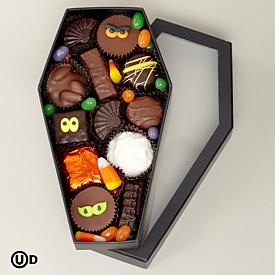